## Import Libraries

In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import pylab

## Load Data

In [6]:
# Load the Excel file
file_path = "Target vs Actual - Dataset.xlsx"
data = pd.ExcelFile(file_path)

# Load individual sheets into DataFrames
actual_sales = data.parse("Actual Sales")
target_sales = data.parse("Target Sales")
product_details = data.parse("Product Details")


In [7]:
# Actual Sales Sheet
actual_sales.head()

,Date,Product Id,Country,Product Category,Cost Price,Sale Price,Quantity,Cost Price Value,Sales Price Value,Discount %,Final Sales Price,Profit
0,2017-01-01,7,United States,Elite,95,165,25,2375,4125,0.1,3712.5,1337.5
1,2017-01-02,5,United Kingdom,Standard,75,145,30,2250,4350,0.0,4350.0,2100.0
2,2017-01-03,3,Singapore,Standard,40,100,25,1000,2500,0.0,2500.0,1500.0
3,2017-01-04,9,India,Premium,125,230,35,4375,8050,0.0,8050.0,3675.0
4,2017-01-05,4,United States,Standard,50,95,30,1500,2850,0.0,2850.0,1350.0


In [8]:
actual_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11941 entries, 0 to 11940
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               11941 non-null  datetime64[ns]
 1   Product Id         11941 non-null  int64         
 2   Country            11941 non-null  object        
 3   Product Category   11941 non-null  object        
 4   Cost Price         11941 non-null  int64         
 5   Sale Price         11941 non-null  int64         
 6   Quantity           11941 non-null  int64         
 7   Cost Price Value   11941 non-null  int64         
 8   Sales Price Value  11941 non-null  int64         
 9   Discount %         11941 non-null  float64       
 10  Final Sales Price  11941 non-null  float64       
 11  Profit             11941 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
actual_sales.describe()

,Date,Product Id,Cost Price,Sale Price,Quantity,Cost Price Value,Sales Price Value,Discount %,Final Sales Price,Profit
count,11941,11941.000000,11941.000000,11941.000000,11941.000000,11941.000000,11941.000000,11941.000000,11941.000000,11941.000000
mean,2019-01-11 23:27:04.688049408,5.863914,90.495352,168.033247,33.700695,3051.132652,5666.171175,0.124194,4962.480634,1911.347982
min,2017-01-01 00:00:00,1.000000,40.000000,95.000000,25.000000,1000.000000,2375.000000,0.000000,1543.750000,125.000000
25%,2018-02-18 00:00:00,3.000000,75.000000,135.000000,30.000000,2250.000000,4050.000000,0.000000,3443.750000,1057.500000
50%,2019-01-28 00:00:00,7.000000,95.000000,165.000000,35.000000,3000.000000,5700.000000,0.100000,4702.500000,1800.000000
75%,2019-12-03 00:00:00,8.000000,110.000000,220.000000,40.000000,3750.000000,6900.000000,0.250000,6210.000000,2510.000000
max,2020-12-31 00:00:00,10.000000,150.000000,280.000000,45.000000,6750.000000,12600.000000,0.350000,12600.000000,5850.000000
std,NaN,2.696015,28.902228,50.786309,6.606721,1163.923443,2079.742212,0.129114,1981.275998,1058.371359


In [10]:
actual_sales.shape

(11941, 12)

In [11]:
# Target Sales Sheet
target_sales.head()

,Date,Product Id,Target Sale
0,2017-01-31,1,100000
1,2017-02-28,1,100000
2,2017-03-31,1,100000
3,2017-04-30,1,100000
4,2017-05-31,1,100000


In [12]:
target_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         480 non-null    datetime64[ns]
 1   Product Id   480 non-null    int64         
 2   Target Sale  480 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 11.4 KB


In [13]:
target_sales.describe()

,Date,Product Id,Target Sale
count,480,480.000000,480.000000
mean,2019-01-14 15:30:00,5.500000,118750.000000
min,2017-01-31 00:00:00,1.000000,100000.000000
25%,2018-01-23 06:00:00,3.000000,111250.000000
50%,2019-01-15 12:00:00,5.500000,120000.000000
75%,2020-01-07 18:00:00,8.000000,127500.000000
max,2020-12-31 00:00:00,10.000000,135000.000000
std,NaN,2.875278,12943.590477


In [14]:
target_sales.shape

(480, 3)

In [15]:
# Product Dteails Sheet
product_details.head()

,Product Id,Product Name,Product Category,Cost Price,Sale Price
0,1,Prod A,Standard,60,100
1,2,Prod B,Standard,80,135
2,3,Prod C,Standard,40,100
3,4,Prod D,Standard,50,95
4,5,Prod E,Standard,75,145


In [16]:
product_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product Id        10 non-null     int64 
 1   Product Name      10 non-null     object
 2   Product Category  10 non-null     object
 3   Cost Price        10 non-null     int64 
 4   Sale Price        10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 532.0+ bytes


In [17]:
product_details.describe()

,Product Id,Cost Price,Sale Price
count,10.00000,10.00000,10.000000
mean,5.50000,88.50000,166.000000
std,3.02765,34.40365,63.016753
min,1.00000,40.00000,95.000000
25%,3.25000,63.75000,108.750000
50%,5.50000,87.50000,155.000000
75%,7.75000,107.50000,212.500000
max,10.00000,150.00000,280.000000


In [18]:
product_details.shape

(10, 5)

## Imputation

In [20]:
# Checking for missing values in actual_sales
actual_sales.isna().sum()

Date                 0
Product Id           0
Country              0
Product Category     0
Cost Price           0
Sale Price           0
Quantity             0
Cost Price Value     0
Sales Price Value    0
Discount %           0
Final Sales Price    0
Profit               0
dtype: int64

In [21]:
# Checking for missing values in traget_sales
target_sales.isna().sum()

Date           0
Product Id     0
Target Sale    0
dtype: int64

In [22]:
# Checking for missing values in product_details
product_details.isna().sum()

Product Id          0
Product Name        0
Product Category    0
Cost Price          0
Sale Price          0
dtype: int64

## Duplicates

In [24]:
# Handling duplicate rows in actual_sales
duplicate = actual_sales.duplicated()
count = 0
for i in duplicate: 
    if i == True:
        count += 1
print("Total duplicate rows are: ", count)

Total duplicate rows are:  1752


In [25]:
actual_sales = actual_sales.drop_duplicates()
print("Shape of actual_sales after removing duplicates ", actual_sales.shape)

Shape of actual_sales after removing duplicates  (10189, 12)


In [26]:
# Handling duplicate rows in target_sales
duplicate_t = target_sales.duplicated()
count = 0
for i in duplicate_t: 
    if i == True:
        count += 1
print("Total duplicate rows are: ", count)

Total duplicate rows are:  0


In [27]:
# Handling duplicate rows in product_details
duplicate_p = product_details.duplicated()
count = 0
for i in duplicate_p: 
    if i == True:
        count += 1
print("Total duplicate rows are: ", count)

Total duplicate rows are:  0


## Outliers

<Axes: ylabel='Quantity'>

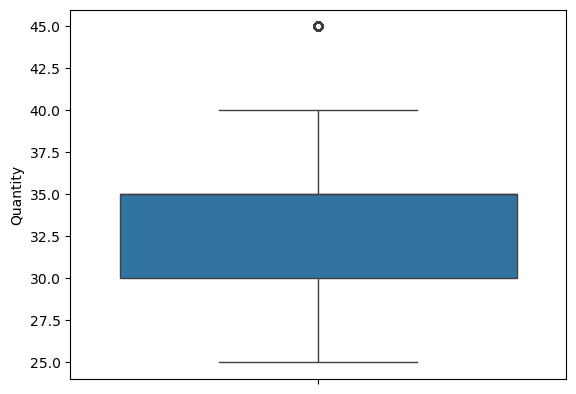

In [29]:
# Handling Outliers for Quantity column
sns.boxplot(actual_sales.Quantity)

In [30]:
# Detecting outliers of Quantity
IQR_q = actual_sales["Quantity"].quantile(0.75) - actual_sales["Quantity"].quantile(0.25)
print("IQR for Quntity is ", IQR_q)
lower_q = actual_sales["Quantity"].quantile(0.25) - (IQR_q * 1.5)
print("Lower limit for Qunatity is ", lower_q)
upper_q = actual_sales["Quantity"].quantile(0.75) + (IQR_q * 1.5)
print("Upper limit for Qunatity is ", upper_q)

IQR for Quntity is  5.0
Lower limit for Qunatity is  22.5
Upper limit for Qunatity is  42.5


<Axes: ylabel='Quantity'>

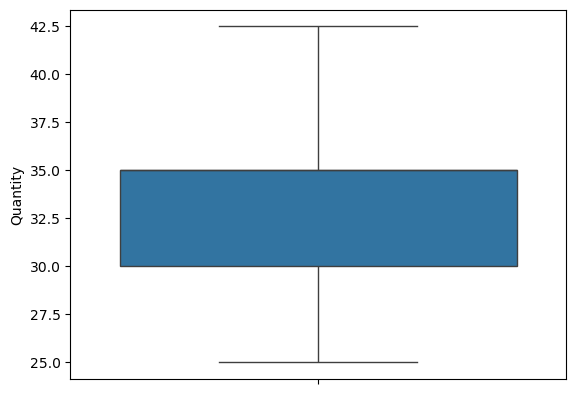

In [31]:
# Replacing outliers of Quantity
actual_sales["Quantity"] = pd.DataFrame(np.where(actual_sales["Quantity"] > upper_q, upper_q, np.where(actual_sales["Quantity"] < lower_q, lower_q, actual_sales["Quantity"])))
sns.boxplot(actual_sales["Quantity"])

<Axes: ylabel='Cost Price Value'>

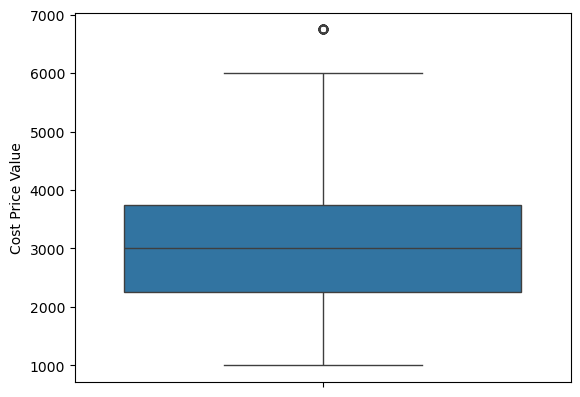

In [32]:
# Handling Outliers for Cost Price Value column
sns.boxplot(actual_sales["Cost Price Value"])

In [33]:
# Detecting outliers of Cost Price Value
IQR_cpv = actual_sales["Cost Price Value"].quantile(0.75) - actual_sales["Cost Price Value"].quantile(0.25)
print("IQR for Cost Price Value is ", IQR_cpv)
lower_cpv = actual_sales["Cost Price Value"].quantile(0.25) - (IQR_cpv * 1.5)
print("Lower limit for Cost Price Value is ", lower_cpv)
upper_cpv = actual_sales["Cost Price Value"].quantile(0.75) + (IQR_cpv * 1.5)
print("Upper limit for Cost Price Value is ", upper_cpv)

IQR for Cost Price Value is  1500.0
Lower limit for Cost Price Value is  0.0
Upper limit for Cost Price Value is  6000.0


<Axes: ylabel='Cost Price Value'>

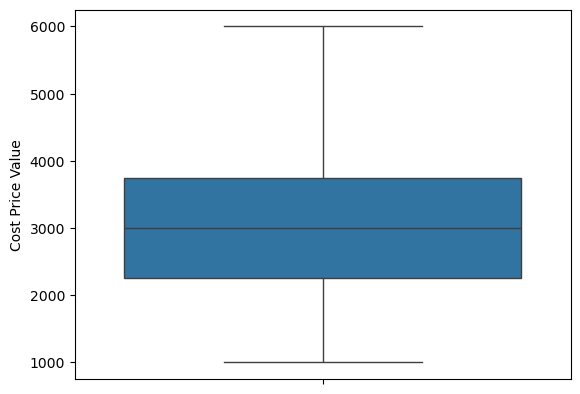

In [34]:
# Replacing outliers of Cost Price Value
actual_sales["Cost Price Value"] = pd.DataFrame(np.where(actual_sales["Cost Price Value"] > upper_cpv, upper_cpv, np.where(actual_sales["Cost Price Value"] < lower_cpv, lower_cpv, actual_sales["Cost Price Value"])))
sns.boxplot(actual_sales["Cost Price Value"])

<Axes: ylabel='Sales Price Value'>

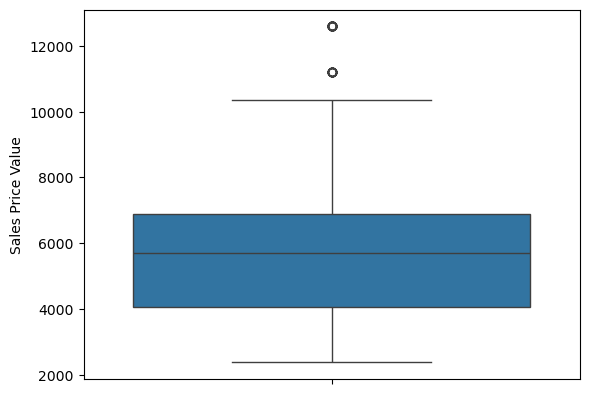

In [35]:
# Handling Outliers for Sales Price Value column
sns.boxplot(actual_sales["Sales Price Value"])

In [36]:
# Detecting outliers of Sales Price Value
IQR_spv = actual_sales["Sales Price Value"].quantile(0.75) - actual_sales["Sales Price Value"].quantile(0.25)
print("IQR for Sales Price Value is ", IQR_spv)
lower_spv = actual_sales["Sales Price Value"].quantile(0.25) - (IQR_spv * 1.5)
print("Lower limit for Sales Price Value is ", lower_spv)
upper_spv = actual_sales["Sales Price Value"].quantile(0.75) + (IQR_spv * 1.5)
print("Upper limit for Sales Price Value is ", upper_spv)

IQR for Sales Price Value is  2850.0
Lower limit for Sales Price Value is  -225.0
Upper limit for Sales Price Value is  11175.0


<Axes: ylabel='Sales Price Value'>

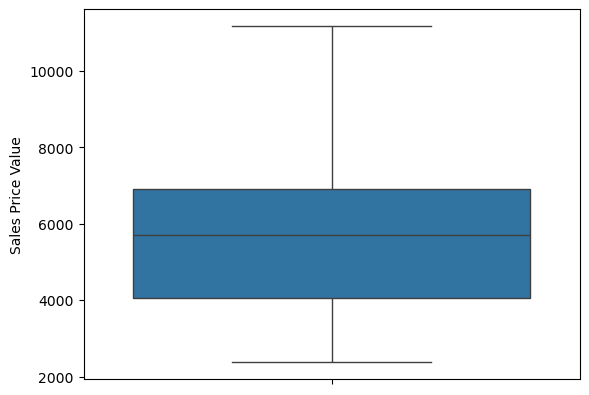

In [37]:
# Replacing outliers of Sales Price Value
actual_sales["Sales Price Value"] = pd.DataFrame(np.where(actual_sales["Sales Price Value"] > upper_spv, upper_spv, np.where(actual_sales["Sales Price Value"] < lower_spv, lower_spv, actual_sales["Sales Price Value"])))
sns.boxplot(actual_sales["Sales Price Value"])

## Discretization

In [39]:
actual_sales.columns

Index(['Date', 'Product Id', 'Country', 'Product Category', 'Cost Price',
       'Sale Price', 'Quantity', 'Cost Price Value', 'Sales Price Value',
       'Discount %', 'Final Sales Price', 'Profit'],
      dtype='object')

In [40]:
# Discretizing Discount % column in actual_sales
actual_sales["Discount Bin"] = pd.cut(actual_sales["Discount %"], bins=3, labels=["Low", "Medium", "High"])

In [41]:
actual_sales.head()

,Date,Product Id,Country,Product Category,Cost Price,Sale Price,Quantity,Cost Price Value,Sales Price Value,Discount %,Final Sales Price,Profit,Discount Bin
0,2017-01-01,7,United States,Elite,95,165,25.0,2375.0,4125.0,0.1,3712.5,1337.5,Low
1,2017-01-02,5,United Kingdom,Standard,75,145,30.0,2250.0,4350.0,0.0,4350.0,2100.0,Low
2,2017-01-03,3,Singapore,Standard,40,100,25.0,1000.0,2500.0,0.0,2500.0,1500.0,Low
3,2017-01-04,9,India,Premium,125,230,35.0,4375.0,8050.0,0.0,8050.0,3675.0,Low
4,2017-01-05,4,United States,Standard,50,95,30.0,1500.0,2850.0,0.0,2850.0,1350.0,Low


## Encoding

In [43]:
product_details.columns

Index(['Product Id', 'Product Name', 'Product Category', 'Cost Price',
       'Sale Price'],
      dtype='object')

In [44]:
# Encoding the Category column in product_details
le = LabelEncoder()
product_details["category_encoded"] = le.fit_transform(product_details["Product Category"])

In [45]:
product_details.head()

,Product Id,Product Name,Product Category,Cost Price,Sale Price,category_encoded
0,1,Prod A,Standard,60,100,2
1,2,Prod B,Standard,80,135,2
2,3,Prod C,Standard,40,100,2
3,4,Prod D,Standard,50,95,2
4,5,Prod E,Standard,75,145,2


## Standardization

In [47]:
# Standardizaing Final Sales Price column in actual_sales
scaler = StandardScaler()
actual_sales[["final_price_standard"]] = scaler.fit_transform(actual_sales[["Final Sales Price"]])

In [48]:
actual_sales.head()

,Date,Product Id,Country,Product Category,Cost Price,Sale Price,Quantity,Cost Price Value,Sales Price Value,Discount %,Final Sales Price,Profit,Discount Bin,final_price_standard
0,2017-01-01,7,United States,Elite,95,165,25.0,2375.0,4125.0,0.1,3712.5,1337.5,Low,-0.625395
1,2017-01-02,5,United Kingdom,Standard,75,145,30.0,2250.0,4350.0,0.0,4350.0,2100.0,Low,-0.302856
2,2017-01-03,3,Singapore,Standard,40,100,25.0,1000.0,2500.0,0.0,2500.0,1500.0,Low,-1.238851
3,2017-01-04,9,India,Premium,125,230,35.0,4375.0,8050.0,0.0,8050.0,3675.0,Low,1.569133
4,2017-01-05,4,United States,Standard,50,95,30.0,1500.0,2850.0,0.0,2850.0,1350.0,Low,-1.061771


## Normalization

In [50]:
# Noramilzing Discount % column in actual_sales
min_max_scaler = MinMaxScaler()
actual_sales[["discount_normal"]] = min_max_scaler.fit_transform(actual_sales[["Discount %"]])

In [51]:
actual_sales.head()

,Date,Product Id,Country,Product Category,Cost Price,Sale Price,Quantity,Cost Price Value,Sales Price Value,Discount %,Final Sales Price,Profit,Discount Bin,final_price_standard,discount_normal
0,2017-01-01,7,United States,Elite,95,165,25.0,2375.0,4125.0,0.1,3712.5,1337.5,Low,-0.625395,0.285714
1,2017-01-02,5,United Kingdom,Standard,75,145,30.0,2250.0,4350.0,0.0,4350.0,2100.0,Low,-0.302856,0.000000
2,2017-01-03,3,Singapore,Standard,40,100,25.0,1000.0,2500.0,0.0,2500.0,1500.0,Low,-1.238851,0.000000
3,2017-01-04,9,India,Premium,125,230,35.0,4375.0,8050.0,0.0,8050.0,3675.0,Low,1.569133,0.000000
4,2017-01-05,4,United States,Standard,50,95,30.0,1500.0,2850.0,0.0,2850.0,1350.0,Low,-1.061771,0.000000


## Q-Q Plot

((array([-3.81523515, -3.59034048, -3.46688384, ...,  3.46688384,
          3.59034048,  3.81523515]),
  array([ 1543.75,  1543.75,  1543.75, ..., 12600.  , 12600.  , 12600.  ])),
 (1939.1337040700118, 4948.597016390225, 0.9807461033136483))

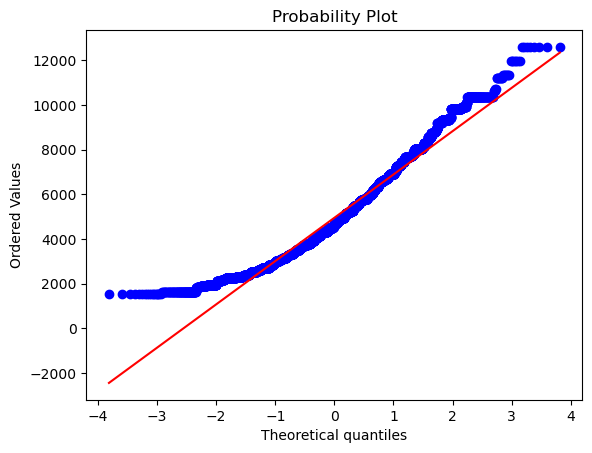

In [108]:
stats.probplot(actual_sales["Final Sales Price"], dist = "norm", plot = pylab)

((array([-3.81523515, -3.59034048, -3.46688384, ...,  3.46688384,
          3.59034048,  3.81523515]),
  array([7.3419698 , 7.3419698 , 7.3419698 , ..., 9.44145209, 9.44145209,
         9.44145209])),
 (0.4069083572791343, 8.42595125312955, 0.9953382184703842))

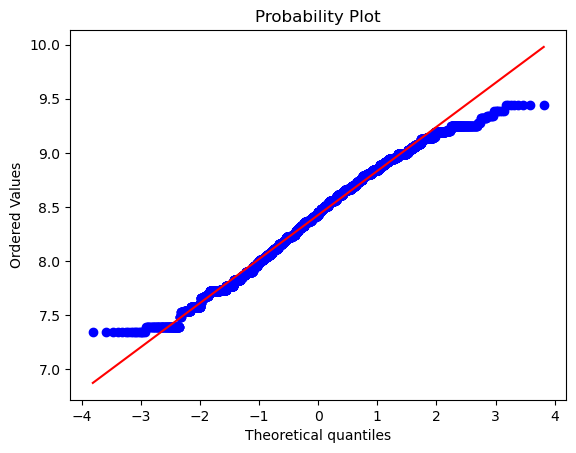

In [120]:
stats.probplot(np.log(actual_sales["Final Sales Price"]), dist = "norm", plot = pylab)

((array([-3.81523515, -3.59034048, -3.46688384, ...,  3.46688384,
          3.59034048,  3.81523515]),
  array([ 39.29058411,  39.29058411,  39.29058411, ..., 112.2497216 ,
         112.2497216 , 112.2497216 ])),
 (13.807661938763916, 68.96238854382453, 0.9940989708023262))

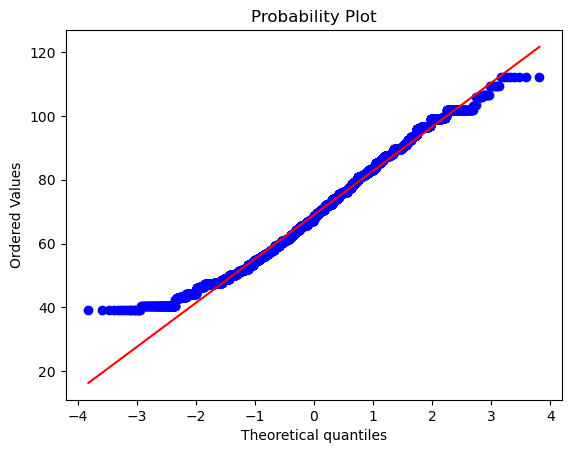

In [118]:
stats.probplot(pow(actual_sales["Final Sales Price"], 1/2) , dist = "norm", plot = pylab)

((array([-3.81523515, -3.59034048, -3.46688384, ...,  3.46688384,
          3.59034048,  3.81523515]),
  array([-1.72265867, -1.72265867, -1.72265867, ...,  3.87117413,
          3.87117413,  3.87117413])),
 (0.9810912122824258, -2.1893641660782353e-16, 0.9807461033136478))

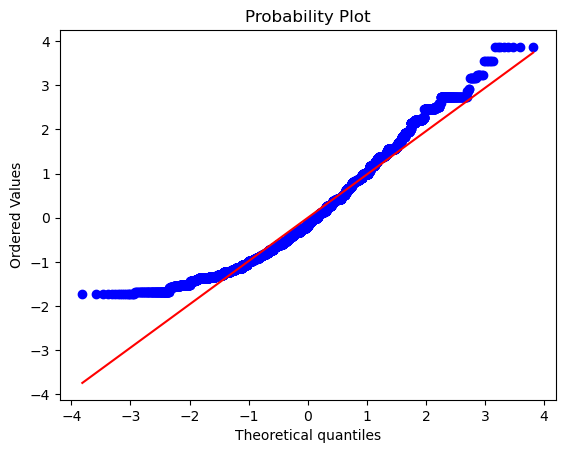

In [54]:
stats.probplot(actual_sales["final_price_standard"], dist = "norm", plot = pylab)

((array([-3.81523515, -3.59034048, -3.46688384, ...,  3.46688384,
          3.59034048,  3.81523515]),
  array([ 125.,  125.,  125., ..., 5850., 5850., 5850.])),
 (1039.9751601129306, 1905.5653155363625, 0.9854233837368279))

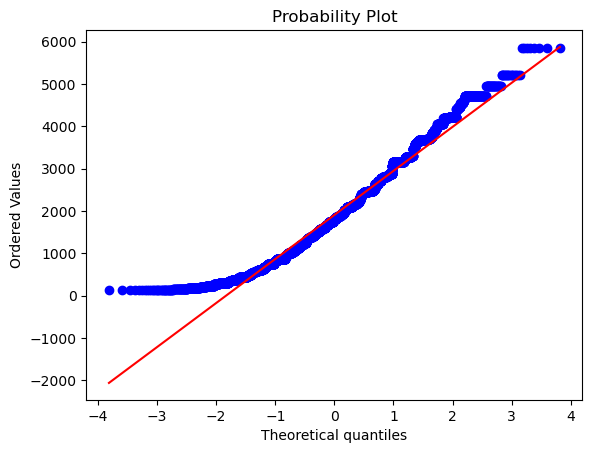

In [55]:
stats.probplot(actual_sales["Profit"], dist = "norm", plot = pylab)

((array([-3.81523515, -3.59034048, -3.46688384, ...,  3.46688384,
          3.59034048,  3.81523515]),
  array([11.18033989, 11.18033989, 11.18033989, ..., 76.4852927 ,
         76.4852927 , 76.4852927 ])),
 (12.608599831649213, 41.779516369440344, 0.9963304920490793))

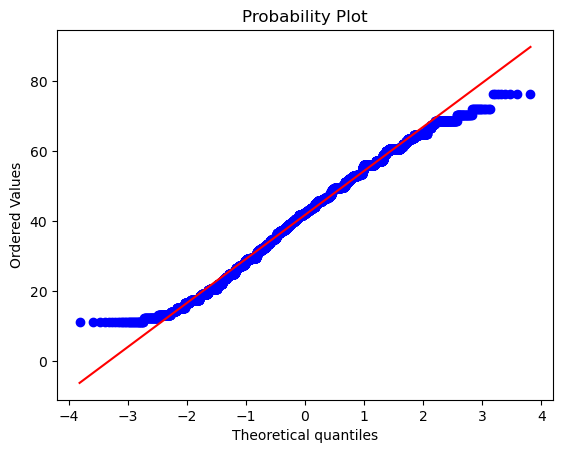

In [112]:
stats.probplot(pow(actual_sales["Profit"], 1/2), dist = "norm", plot = pylab)

((array([-3.81523515, -3.59034048, -3.46688384, ...,  3.46688384,
          3.59034048,  3.81523515]),
  array([4.82831374, 4.82831374, 4.82831374, ..., 8.67419694, 8.67419694,
         8.67419694])),
 (0.675800610554501, 7.356049824704234, 0.9690050763132425))

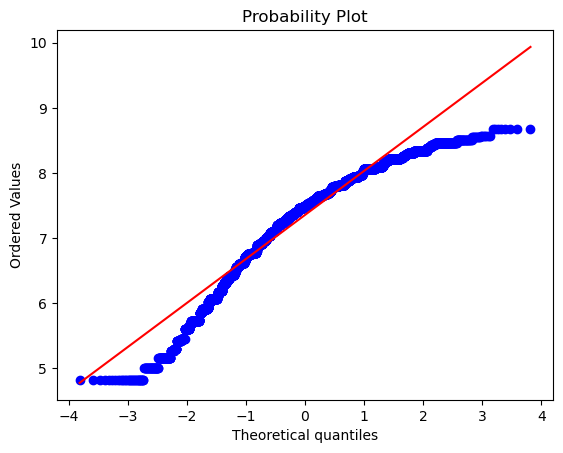

In [116]:
stats.probplot(np.log(actual_sales["Profit"]), dist = "norm", plot = pylab)

((array([-3.81523515, -3.59034048, -3.46688384, ...,  3.46688384,
          3.59034048,  3.81523515]),
  array([0., 0., 0., ..., 1., 1., 1.])),
 (0.32944206420026173, 0.3548084068252877, 0.8939130416958927))

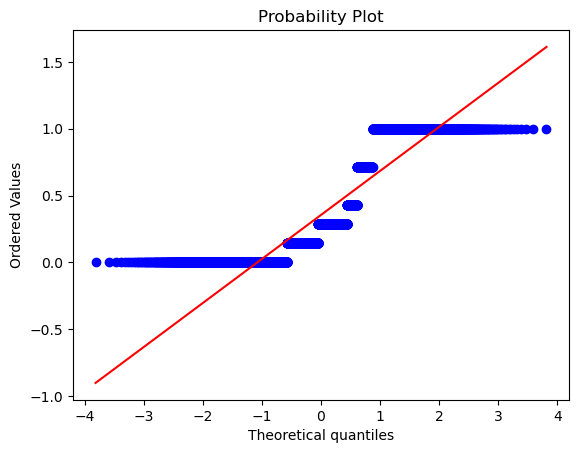

In [56]:
stats.probplot(actual_sales["discount_normal"], dist = "norm", plot = pylab)

## Export Processed Files

In [58]:
# Saving processed actual_sales sheet
actual_sales.to_excel("actual_sales.xlsx", index = False)
print("actual_sales saved successfully")

actual_sales saved successfully


In [59]:
# Saving processed target_sales sheet
target_sales.to_excel("target_sales.xlsx", index = False)
print("target_sales saved successfully")

target_sales saved successfully


In [60]:
# Saving processed product_details sheet
product_details.to_excel("product_details.xlsx", index = False)
print("product_details saved successfully")

product_details saved successfully
